## Business Case:Porter: Neural Networks Regression

**Problem Statement:**

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

**Data Dictionary:**

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

1.  market_id : integer id for the market where the restaurant lies
2.  created_at : the timestamp at which the order was placed
3.  actual_delivery_time : the timestamp when the order was delivered
4.  store_primary_category : category for the restaurant
5.  order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
6.   total_items subtotal : final price of the order
7.   num_distinct_items : the number of distinct items in the order
8.   min_item_price : price of the cheapest item in the order
9.   max_item_price : price of the costliest item in order
10.    total_onshift_partners : number of delivery partners on duty at the time order was placed
11.    total_busy_partners : number of delivery partners attending to other tasks
12.   total_outstanding_orders : total number of orders to be fulfilled at the moment


In [1]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [4]:
df.shape

(197428, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
# We check the number of null values
total_null_values = df.isnull().sum().to_frame().rename(columns={0:'Total_null_values'})
total_null_values['%'] = (total_null_values["Total_null_values"]/len(df))*100
total_null_values

,Total_null_values,%
market_id,987,0.499929
created_at,0,0.000000
actual_delivery_time,7,0.003546
store_id,0,0.000000
store_primary_category,4760,2.411006
order_protocol,995,0.503981
total_items,0,0.000000
subtotal,0,0.000000
num_distinct_items,0,0.000000
min_item_price,0,0.000000


**Data Cleaning And Feature Engineering:**

In [7]:
#extracting features from Created_at Feature
df['year']=df['created_at'].str.split('-',expand=True)[0].astype(str).astype(int)
df['month']=df['created_at'].str.split('-',expand=True)[1].astype(str).astype(int)
df['day']=df['created_at'].str.split('-',expand=True)[2]
df['day']=df['day'].str.split(' ',expand=True)[0].astype(str).astype(int)

In [8]:
#converting created_at and actual_delivery_time into date_time format
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [9]:
#creating a new feature'Time_for_Delivery' to store the time taken for delivery in minutes
df['Time_for_Delivery']=(df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [10]:
#Dropping Created_at and actual_delivery_time
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   store_id                  197428 non-null  object 
 2   store_primary_category    192668 non-null  object 
 3   order_protocol            196433 non-null  float64
 4   total_items               197428 non-null  int64  
 5   subtotal                  197428 non-null  int64  
 6   num_distinct_items        197428 non-null  int64  
 7   min_item_price            197428 non-null  int64  
 8   max_item_price            197428 non-null  int64  
 9   total_onshift_partners    181166 non-null  float64
 10  total_busy_partners       181166 non-null  float64
 11  total_outstanding_orders  181166 non-null  float64
 12  year                      197428 non-null  int64  
 13  month                     197428 non-null  i

In [12]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,year,month,day,Time_for_Delivery
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,197428.000000,197428.000000,197421.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,2014.999995,1.653170,15.296721,48.470956
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,0.002251,0.476345,9.200962,320.493482
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,2014.000000,1.000000,1.000000,1.683333
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,2015.000000,1.000000,7.000000,35.066667
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,2015.000000,2.000000,14.000000,44.333333
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,2015.000000,2.000000,24.000000,56.350000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2015.000000,10.000000,31.000000,141947.650000


we can see that there are some negative values in some Features which can't happen so dropping those columns

In [13]:
df.drop(df[df['min_item_price']<0].index,axis=0,inplace=True)
df.drop(df[df['total_outstanding_orders']<0].index,axis=0,inplace=True)
df.drop(df[df['total_onshift_partners']<0].index,axis=0,inplace=True)
df.drop(df[df['total_busy_partners']<0].index,axis=0,inplace=True)

In [14]:
# We check the number of null values
total_null_values = df.isnull().sum().to_frame().rename(columns={0:'Total_null_values'})
total_null_values['%'] = (total_null_values["Total_null_values"]/len(df))*100
total_null_values

,Total_null_values,%
market_id,987,0.500167
store_id,0,0.000000
store_primary_category,4758,2.411141
order_protocol,995,0.504221
total_items,0,0.000000
subtotal,0,0.000000
num_distinct_items,0,0.000000
min_item_price,0,0.000000
max_item_price,0,0.000000
total_onshift_partners,16261,8.240344


Imputing Null Values

In [15]:
df['market_id'] = df['market_id'].fillna(df['market_id'].mode()[0])
df['store_primary_category'] = df['store_primary_category'].fillna(df['store_primary_category'].mode()[0])
df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].mode()[0])

In [16]:
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].mean())
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df['total_onshift_partners'].mean())
df['total_busy_partners'] = df['total_busy_partners'].fillna(df['total_busy_partners'].mean())
df['Time_for_Delivery'] = df['Time_for_Delivery'].fillna(df['Time_for_Delivery'].mean())

In [17]:
df['total_outstanding_orders'] = df['total_outstanding_orders'].astype(int)
df['total_onshift_partners'] = df['total_onshift_partners'].astype(int)
df['total_busy_partners'] = df['total_busy_partners'].astype(int)
df['Time_for_Delivery'] = df['Time_for_Delivery'].astype(int)

In [18]:
# We check the number of null values
total_null_values = df.isnull().sum().to_frame().rename(columns={0:'Total_null_values'})
total_null_values['%'] = (total_null_values["Total_null_values"]/len(df))*100
total_null_values

,Total_null_values,%
market_id,0,0.0
store_id,0,0.0
store_primary_category,0,0.0
order_protocol,0,0.0
total_items,0,0.0
subtotal,0,0.0
num_distinct_items,0,0.0
min_item_price,0,0.0
max_item_price,0,0.0
total_onshift_partners,0,0.0


In [19]:
#unique values in each column
dict_Unique={}
for feature in df.columns:
    dict_Unique[feature]=((df[feature].value_counts().shape[0]))
pd.DataFrame(dict_Unique,index=['unique_counts']).transpose()



,unique_counts
market_id,6
store_id,6742
store_primary_category,74
order_protocol,7
total_items,57
subtotal,8365
num_distinct_items,20
min_item_price,2294
max_item_price,2644
total_onshift_partners,168


In [20]:
df["market_id"] = df["market_id"].astype("object")
df["order_protocol"] = df["order_protocol"].astype("object")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197334 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   market_id                 197334 non-null  object
 1   store_id                  197334 non-null  object
 2   store_primary_category    197334 non-null  object
 3   order_protocol            197334 non-null  object
 4   total_items               197334 non-null  int64 
 5   subtotal                  197334 non-null  int64 
 6   num_distinct_items        197334 non-null  int64 
 7   min_item_price            197334 non-null  int64 
 8   max_item_price            197334 non-null  int64 
 9   total_onshift_partners    197334 non-null  int64 
 10  total_busy_partners       197334 non-null  int64 
 11  total_outstanding_orders  197334 non-null  int64 
 12  year                      197334 non-null  int64 
 13  month                     197334 non-null  int64 
 14  day 

In [25]:
df_numerical=df.select_dtypes(exclude='object')
df_categorical=df.select_dtypes(include='object')

In [23]:
df_numerical.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'year', 'month', 'day',
       'Time_for_Delivery'],
      dtype='object')

In [24]:
df_categorical.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol'], dtype='object')

**UniVariate Analysis**

Text(0.5, 1.0, 'Distribution of max_item_price')

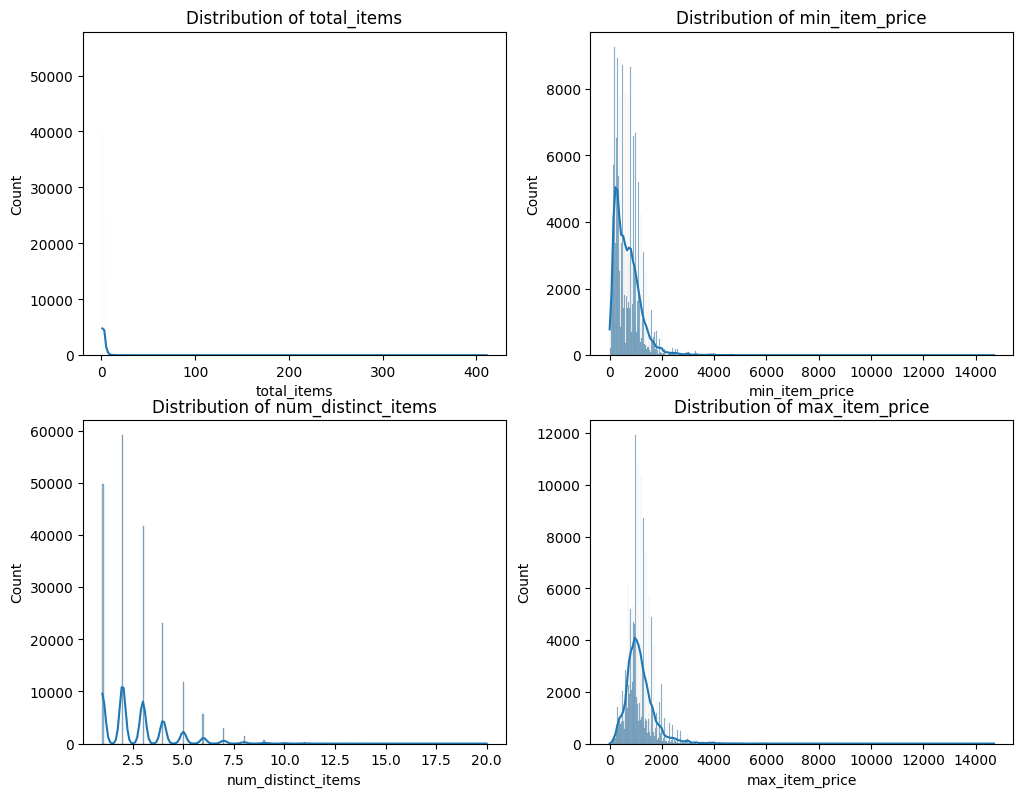

In [ ]:
fig=plt.figure(figsize=(12,8))
fig.subplots_adjust(top=1.0)
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((2,2),(0,0))
ax[1]=plt.subplot2grid((2,2),(0,1))
ax[2]=plt.subplot2grid((2,2),(1,0))
ax[3]=plt.subplot2grid((2,2),(1,1))
sns.histplot(data=df, x="total_items", kde=True,palette='rainbow', ax=ax[0])
ax[0].set_title('Distribution of total_items')
sns.histplot(data=df, x="min_item_price", kde=True,palette='rainbow', ax=ax[1])
ax[1].set_title('Distribution of min_item_price')
sns.histplot(data=df, x="num_distinct_items", kde=True,palette='rainbow', ax=ax[2])
ax[2].set_title('Distribution of num_distinct_items')
sns.histplot(data=df, x="max_item_price", kde=True,palette='rainbow', ax=ax[3])
ax[3].set_title('Distribution of max_item_price')

Text(0.5, 1.0, 'Distribution of total_busy_partners')

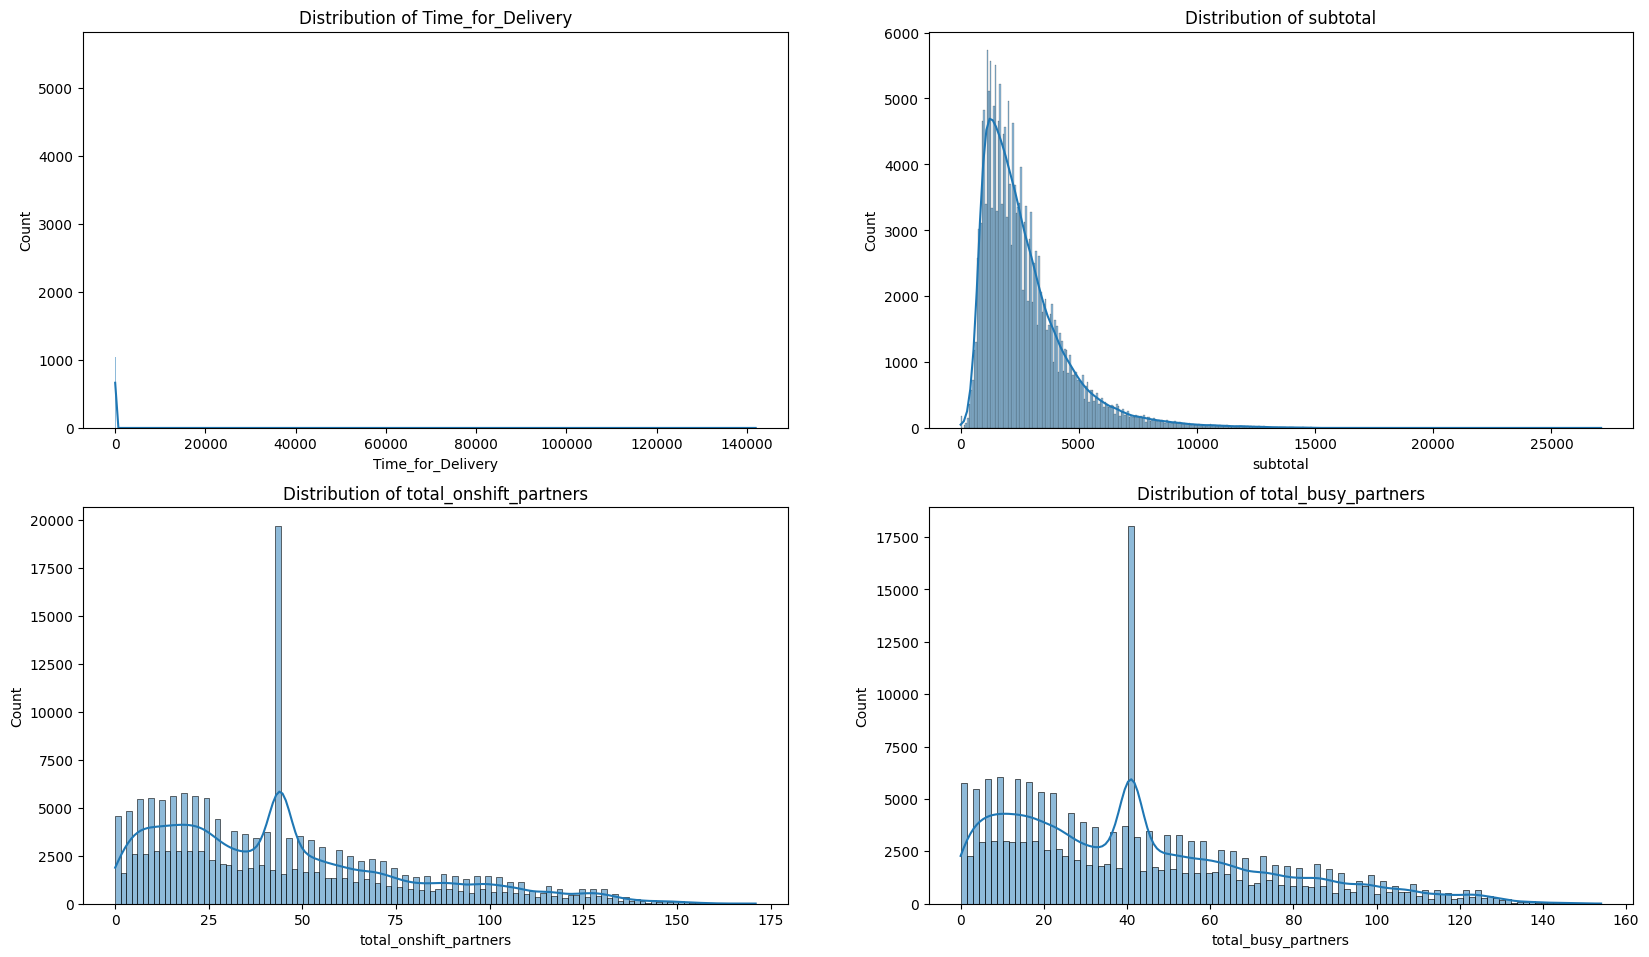

In [ ]:
fig=plt.figure(figsize=(20,8))
fig.subplots_adjust(top=1.2)
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((2,2),(0,0))
ax[1]=plt.subplot2grid((2,2),(0,1))
ax[2]=plt.subplot2grid((2,2),(1,0))
ax[3]=plt.subplot2grid((2,2),(1,1))
sns.histplot(data=df, x="Time_for_Delivery", kde=True,palette='rainbow', ax=ax[0])
ax[0].set_title('Distribution of Time_for_Delivery')
sns.histplot(data=df, x="subtotal", kde=True,palette='rainbow', ax=ax[1])
ax[1].set_title('Distribution of subtotal')
sns.histplot(data=df, x="total_onshift_partners", kde=True,palette='rainbow', ax=ax[2])
ax[2].set_title('Distribution of total_onshift_partners')
sns.histplot(data=df, x="total_busy_partners", kde=True,palette='rainbow', ax=ax[3])
ax[3].set_title('Distribution of total_busy_partners')

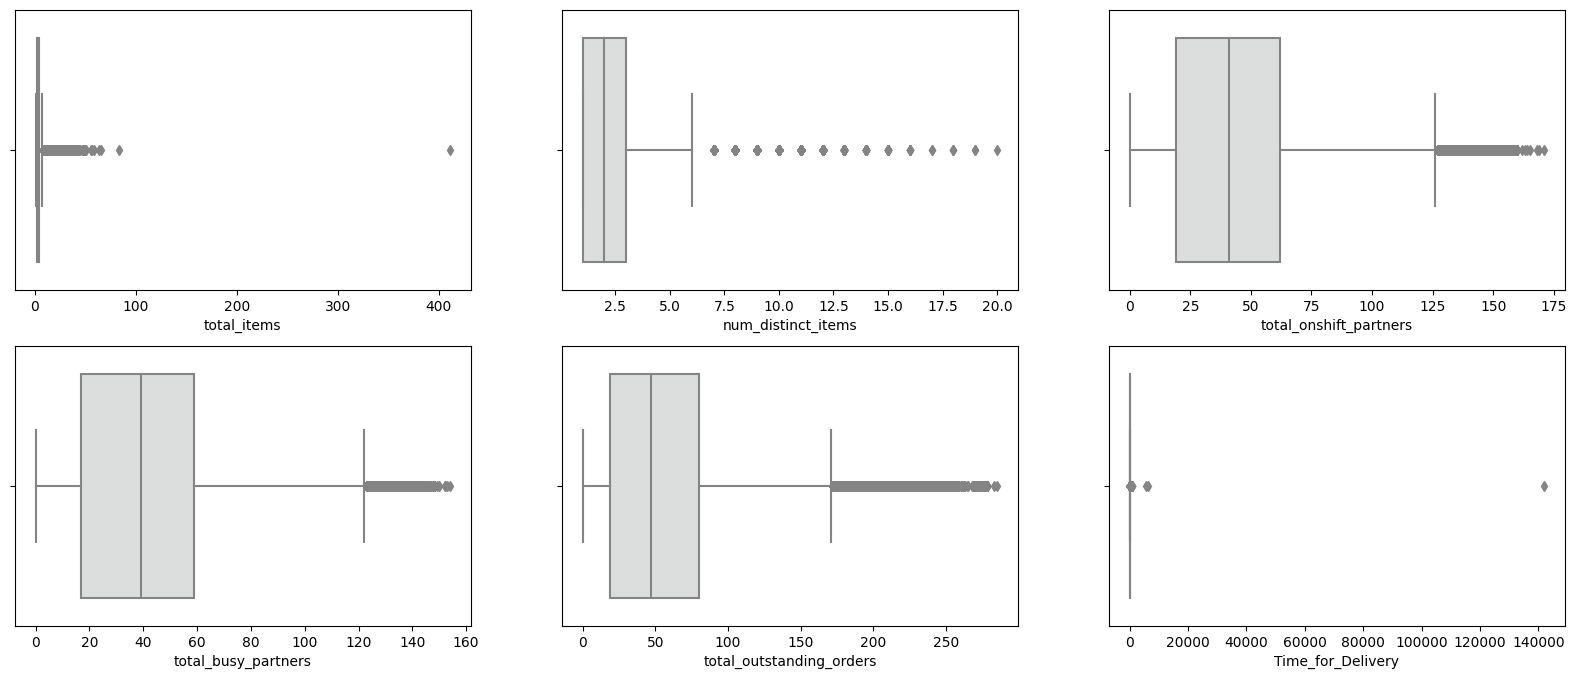

In [ ]:
fig=plt.figure(figsize=(20,8))

ax=[None for _ in range(6)]
ax[0]=plt.subplot2grid((2,3),(0,0))
ax[1]=plt.subplot2grid((2,3),(0,1))
ax[2]=plt.subplot2grid((2,3),(0,2))
ax[3]=plt.subplot2grid((2,3),(1,0))
ax[4]=plt.subplot2grid((2,3),(1,1))
ax[5]=plt.subplot2grid((2,3),(1,2))

sns.boxplot(data=df, x="total_items",palette='coolwarm_r', ax=ax[0])
sns.boxplot(data=df, x="num_distinct_items",palette='coolwarm_r', ax=ax[1])
sns.boxplot(data=df, x="total_onshift_partners",palette='coolwarm_r', ax=ax[2])
sns.boxplot(data=df, x="total_busy_partners",palette='coolwarm_r', ax=ax[3])
sns.boxplot(data=df, x="total_outstanding_orders",palette='coolwarm_r', ax=ax[4])
sns.boxplot(data=df, x="Time_for_Delivery",palette='coolwarm_r', ax=ax[5])
plt.show()

<Axes: xlabel='market_id'>

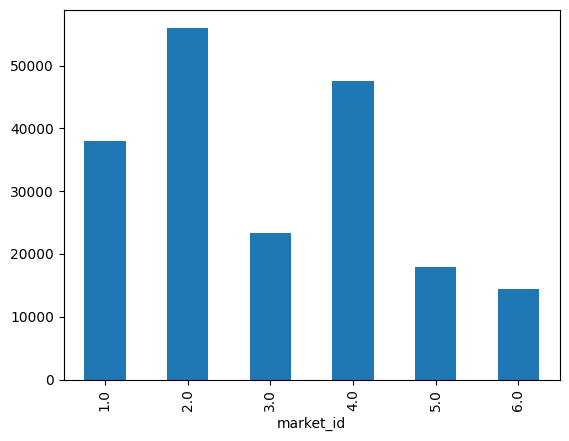

In [ ]:
df.groupby('market_id')['store_id'].count().plot.bar()

<Axes: xlabel='order_protocol'>

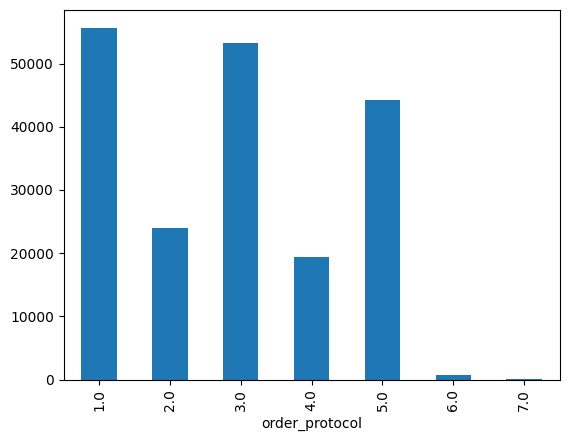

In [ ]:
df.groupby('order_protocol')['store_id'].count().plot.bar()

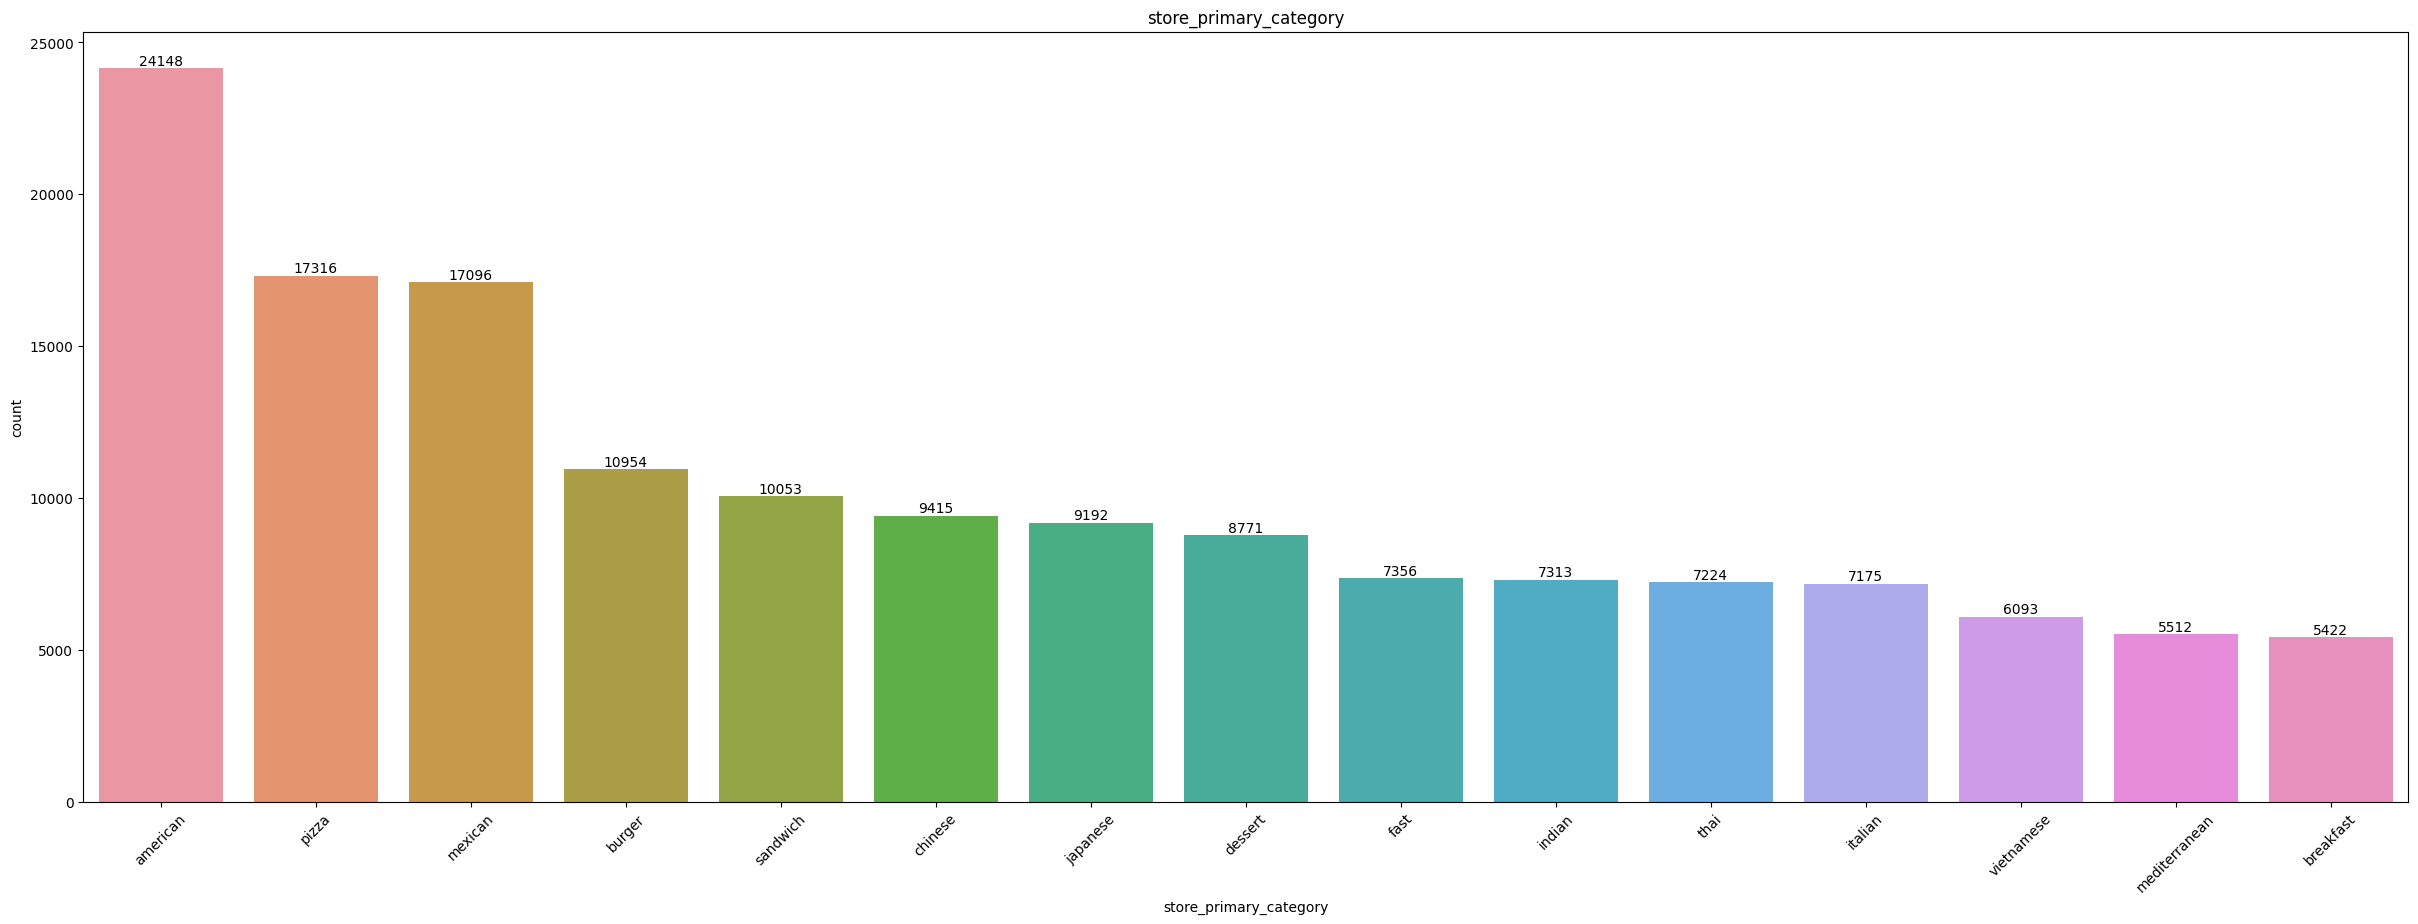

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'store_primary_category', 
              order = df['store_primary_category'].value_counts().index[:15], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('store_primary_category')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='year', ylabel='count'>

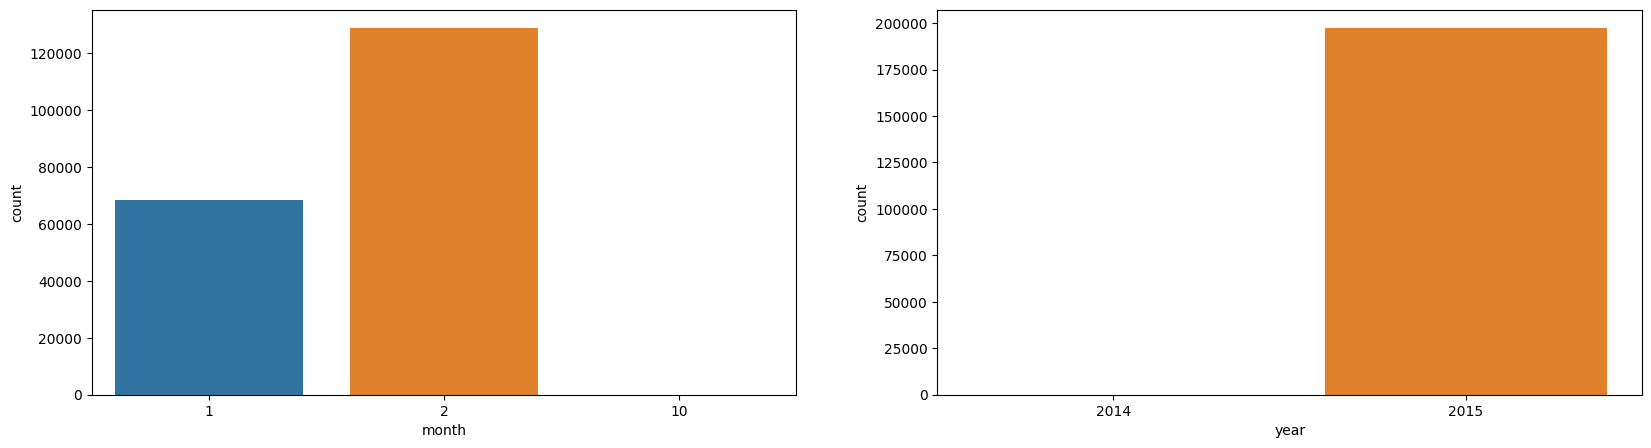

In [ ]:
fig=plt.figure(figsize=(20,5))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.countplot(x='month',data=df,ax=ax[0])
sns.countplot(x='year',data=df,ax=ax[1])

**Bivariate and Multivariate Analysis**

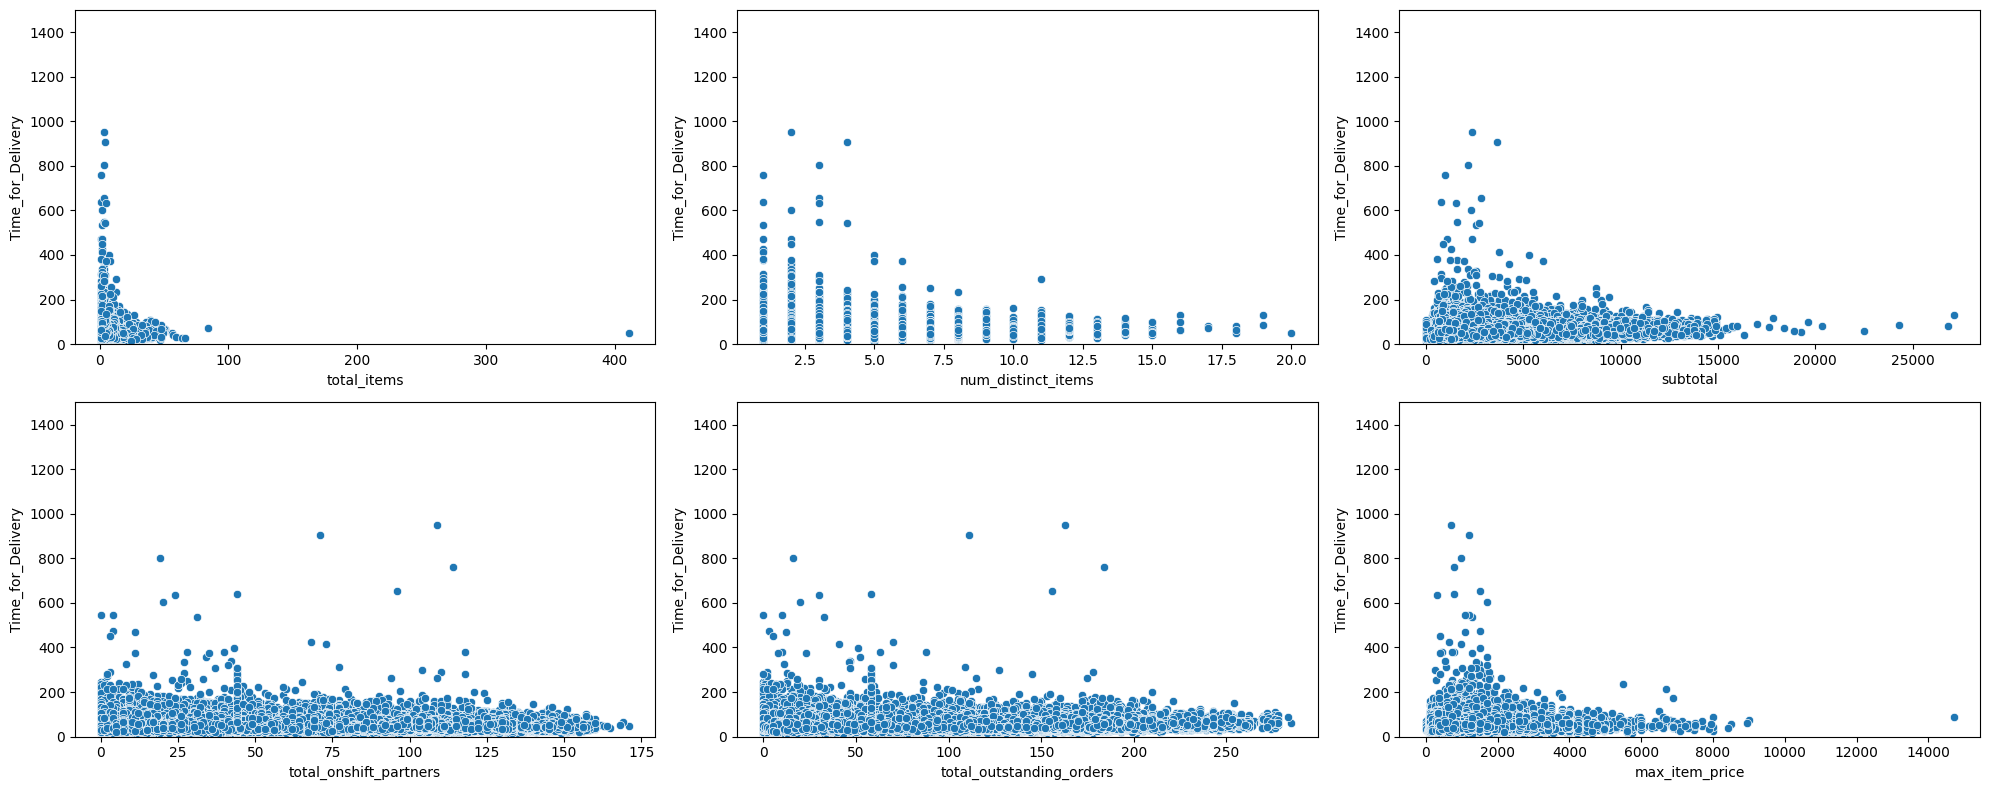

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=[None for _ in range(6)]
ax[0]=plt.subplot2grid((2,3),(0,0))
ax[1]=plt.subplot2grid((2,3),(0,1))
ax[2]=plt.subplot2grid((2,3),(0,2))
ax[3]=plt.subplot2grid((2,3),(1,0))
ax[4]=plt.subplot2grid((2,3),(1,1))
ax[5]=plt.subplot2grid((2,3),(1,2))
sns.scatterplot(x='total_items',y='Time_for_Delivery',data=df,ax=ax[0]).set_ylim(0, 1500)
sns.scatterplot(x='num_distinct_items',y='Time_for_Delivery',data=df,ax=ax[1]).set_ylim(0, 1500)
sns.scatterplot(x='subtotal',y='Time_for_Delivery',data=df,ax=ax[2]).set_ylim(0, 1500)
sns.scatterplot(x='total_onshift_partners',y='Time_for_Delivery',data=df,ax=ax[3]).set_ylim(0, 1500)
sns.scatterplot(x='total_outstanding_orders',y='Time_for_Delivery',data=df,ax=ax[4]).set_ylim(0, 1500)
sns.scatterplot(x='max_item_price',y='Time_for_Delivery',data=df,ax=ax[5]).set_ylim(0, 1500)
plt.tight_layout()

(0.0, 1500.0)

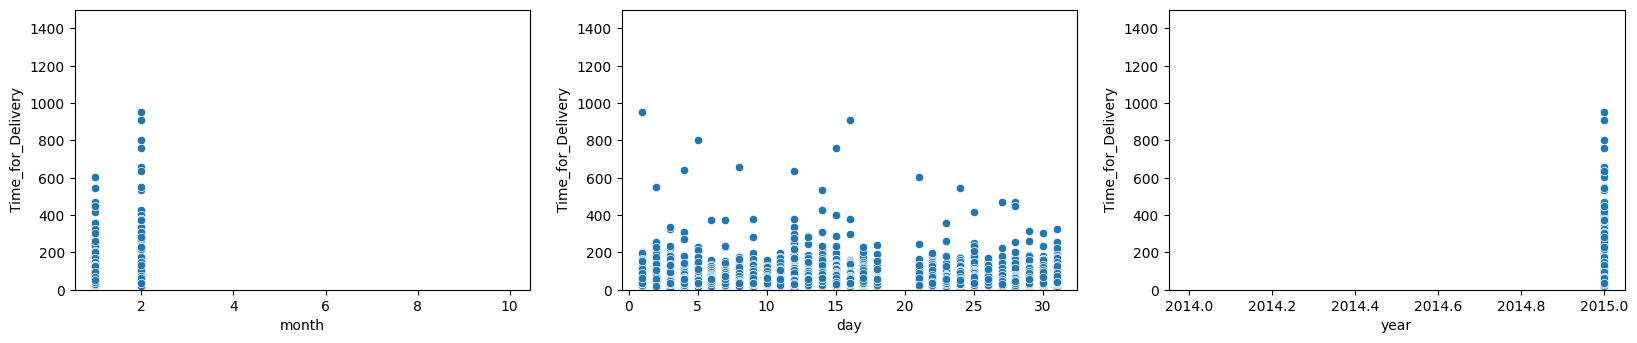

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=[None for _ in range(3)]
ax[0]=plt.subplot2grid((2,3),(0,0))
ax[1]=plt.subplot2grid((2,3),(0,1))
ax[2]=plt.subplot2grid((2,3),(0,2))
sns.scatterplot(x='month',y='Time_for_Delivery',data=df,ax=ax[0]).set_ylim(0, 1500)
sns.scatterplot(x='day',y='Time_for_Delivery',data=df,ax=ax[1]).set_ylim(0, 1500)
sns.scatterplot(x='year',y='Time_for_Delivery',data=df,ax=ax[2]).set_ylim(0, 1500)

In [ ]:
store_category_money = df.groupby('store_primary_category')['subtotal'].sum().to_frame().reset_index()
store_category_money = store_category_money.sort_values('subtotal',ascending=False)
store_category_money = store_category_money.head(10)
store_category_money = store_category_money.reset_index(drop=True)
store_category_money

,store_primary_category,subtotal
0,american,64825621
1,pizza,52075857
2,mexican,39244595
3,japanese,30899304
4,chinese,27007019
5,italian,26854040
6,burger,24266371
7,thai,22453117
8,dessert,21376280
9,indian,21263114


<Axes: xlabel='subtotal', ylabel='store_primary_category'>

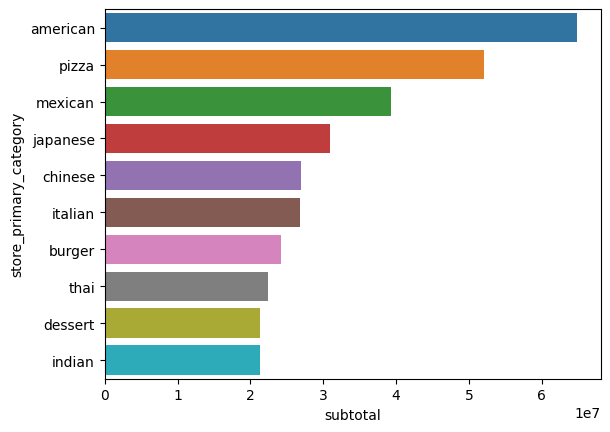

In [ ]:
sns.barplot(store_category_money,x='subtotal',y='store_primary_category')

Observations:

*  More American Food is being Ordered followed by Pizza
*  More orders are happened in second month
*  More orders are from ordered protocal of 1
*  There are more stores present in market ID 2
*  Some Outliers are present in some Numerical feature columns

In [ ]:
## correlation matrix for heat map
df.corr()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,year,month,day,Time_for_Delivery
total_items,1.000000,0.558700,0.764325,-0.393230,-0.057945,0.030581,0.027580,0.033071,0.001855,-0.004519,0.004214,0.004914
subtotal,0.558700,1.000000,0.681207,0.036944,0.505563,0.125979,0.120912,0.125088,0.001219,-0.005930,0.008184,0.011200
num_distinct_items,0.764325,0.681207,1.000000,-0.448745,0.041993,0.063143,0.058060,0.064836,0.002307,-0.001810,0.002135,0.006739
min_item_price,-0.393230,0.036944,-0.448745,1.000000,0.545334,0.040541,0.042000,0.039279,-0.003919,0.001982,0.000237,0.004772
max_item_price,-0.057945,0.505563,0.041993,0.545334,1.000000,0.128381,0.126364,0.125991,-0.001755,0.004919,-0.000686,0.009414
total_onshift_partners,0.030581,0.125979,0.063143,0.040541,0.128381,1.000000,0.943768,0.936084,0.000052,0.023886,0.006526,0.003811
total_busy_partners,0.027580,0.120912,0.058060,0.042000,0.126364,0.943768,1.000000,0.932871,0.000051,-0.044909,0.055292,0.004932
total_outstanding_orders,0.033071,0.125088,0.064836,0.039279,0.125991,0.936084,0.932871,1.000000,0.000003,0.043731,-0.016356,0.010038
year,0.001855,0.001219,0.002307,-0.003919,-0.001755,0.000052,0.000051,0.000003,1.000000,-0.039446,-0.000906,-0.996475
month,-0.004519,-0.005930,-0.001810,0.001982,0.004919,0.023886,-0.044909,0.043731,-0.039446,1.000000,-0.874892,0.042986


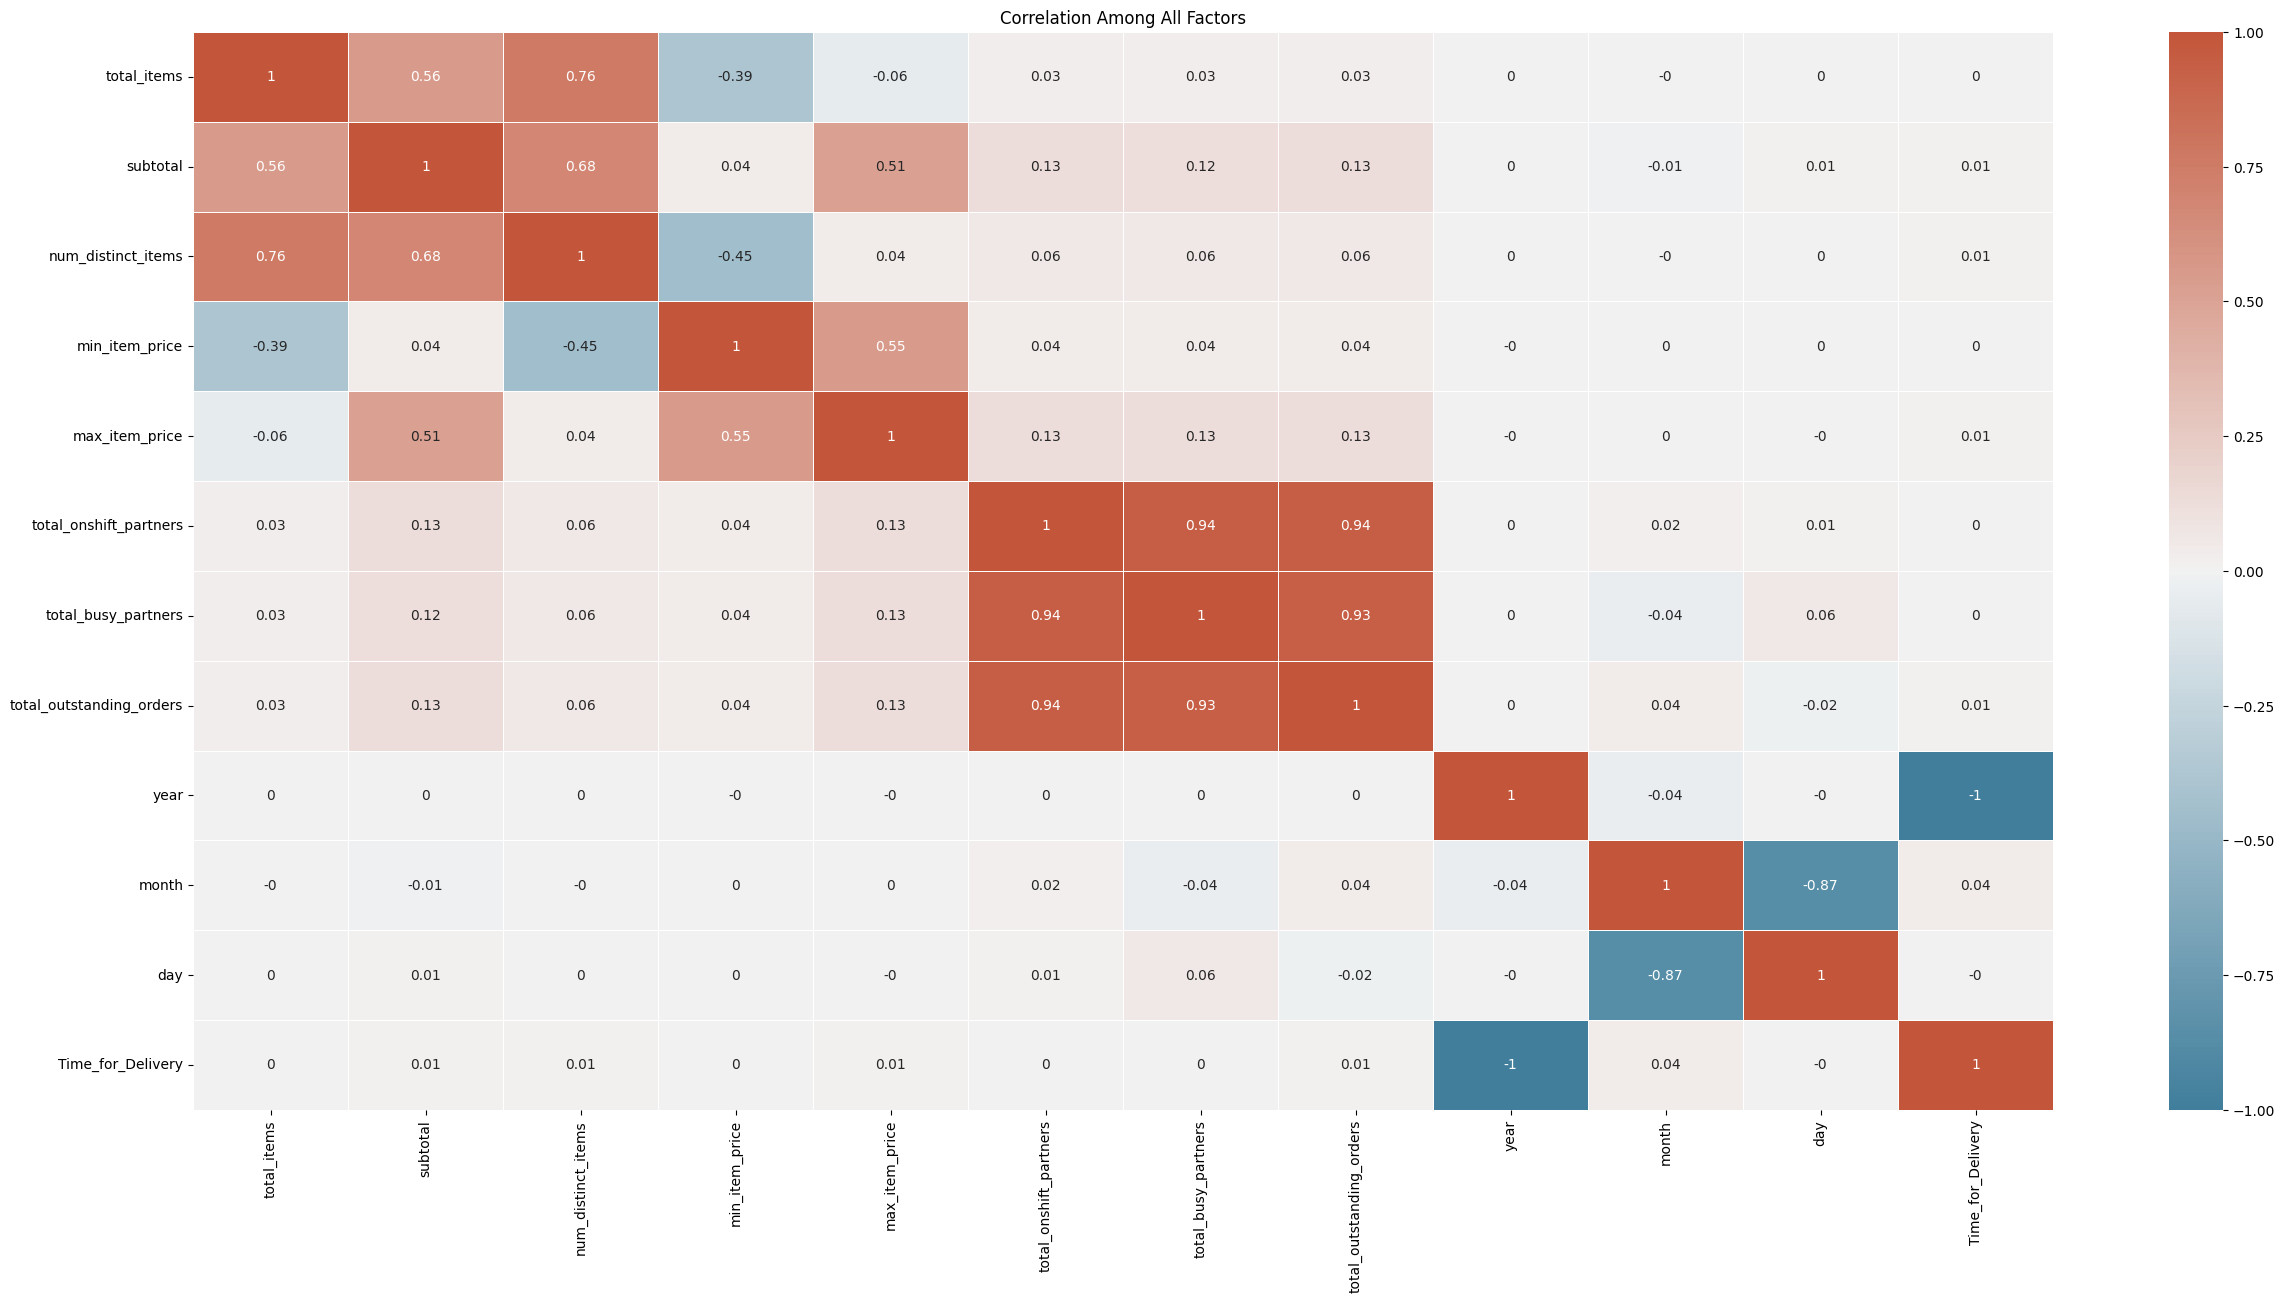

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(30,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors')
sns.heatmap(np.round(df_corr,2), annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

In [ ]:
## spearman correlation matrix for heat map, used for better understanding 
df.corr('spearman')

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,year,month,day,Time_for_Delivery
total_items,1.000000,0.664422,0.916947,-0.590799,-0.006472,0.053060,0.050089,0.054103,0.003162,-0.004382,0.003252,0.155537
subtotal,0.664422,1.000000,0.647630,0.027397,0.592285,0.154712,0.150773,0.157694,0.001228,-0.002717,0.005668,0.235444
num_distinct_items,0.916947,0.647630,1.000000,-0.566371,0.079084,0.064354,0.060568,0.065892,0.002997,-0.000960,0.000542,0.160983
min_item_price,-0.590799,0.027397,-0.566371,1.000000,0.429585,0.052457,0.052713,0.053486,-0.003518,0.003248,-0.000254,0.002352
max_item_price,-0.006472,0.592285,0.079084,0.429585,1.000000,0.160004,0.156873,0.163687,-0.002649,0.007330,-0.000830,0.160088
total_onshift_partners,0.053060,0.154712,0.064354,0.052457,0.160004,1.000000,0.964749,0.954683,-0.000522,0.017156,0.014155,0.080172
total_busy_partners,0.050089,0.150773,0.060568,0.052713,0.156873,0.964749,1.000000,0.957663,-0.000463,-0.025886,0.038143,0.102068
total_outstanding_orders,0.054103,0.157694,0.065892,0.053486,0.163687,0.954683,0.957663,1.000000,-0.000807,0.052410,-0.025600,0.174874
year,0.003162,0.001228,0.002997,-0.003518,-0.002649,-0.000522,-0.000463,-0.000807,1.000000,-0.004730,-0.001195,-0.003900
month,-0.004382,-0.002717,-0.000960,0.003248,0.007330,0.017156,-0.025886,0.052410,-0.004730,1.000000,-0.824951,0.061136


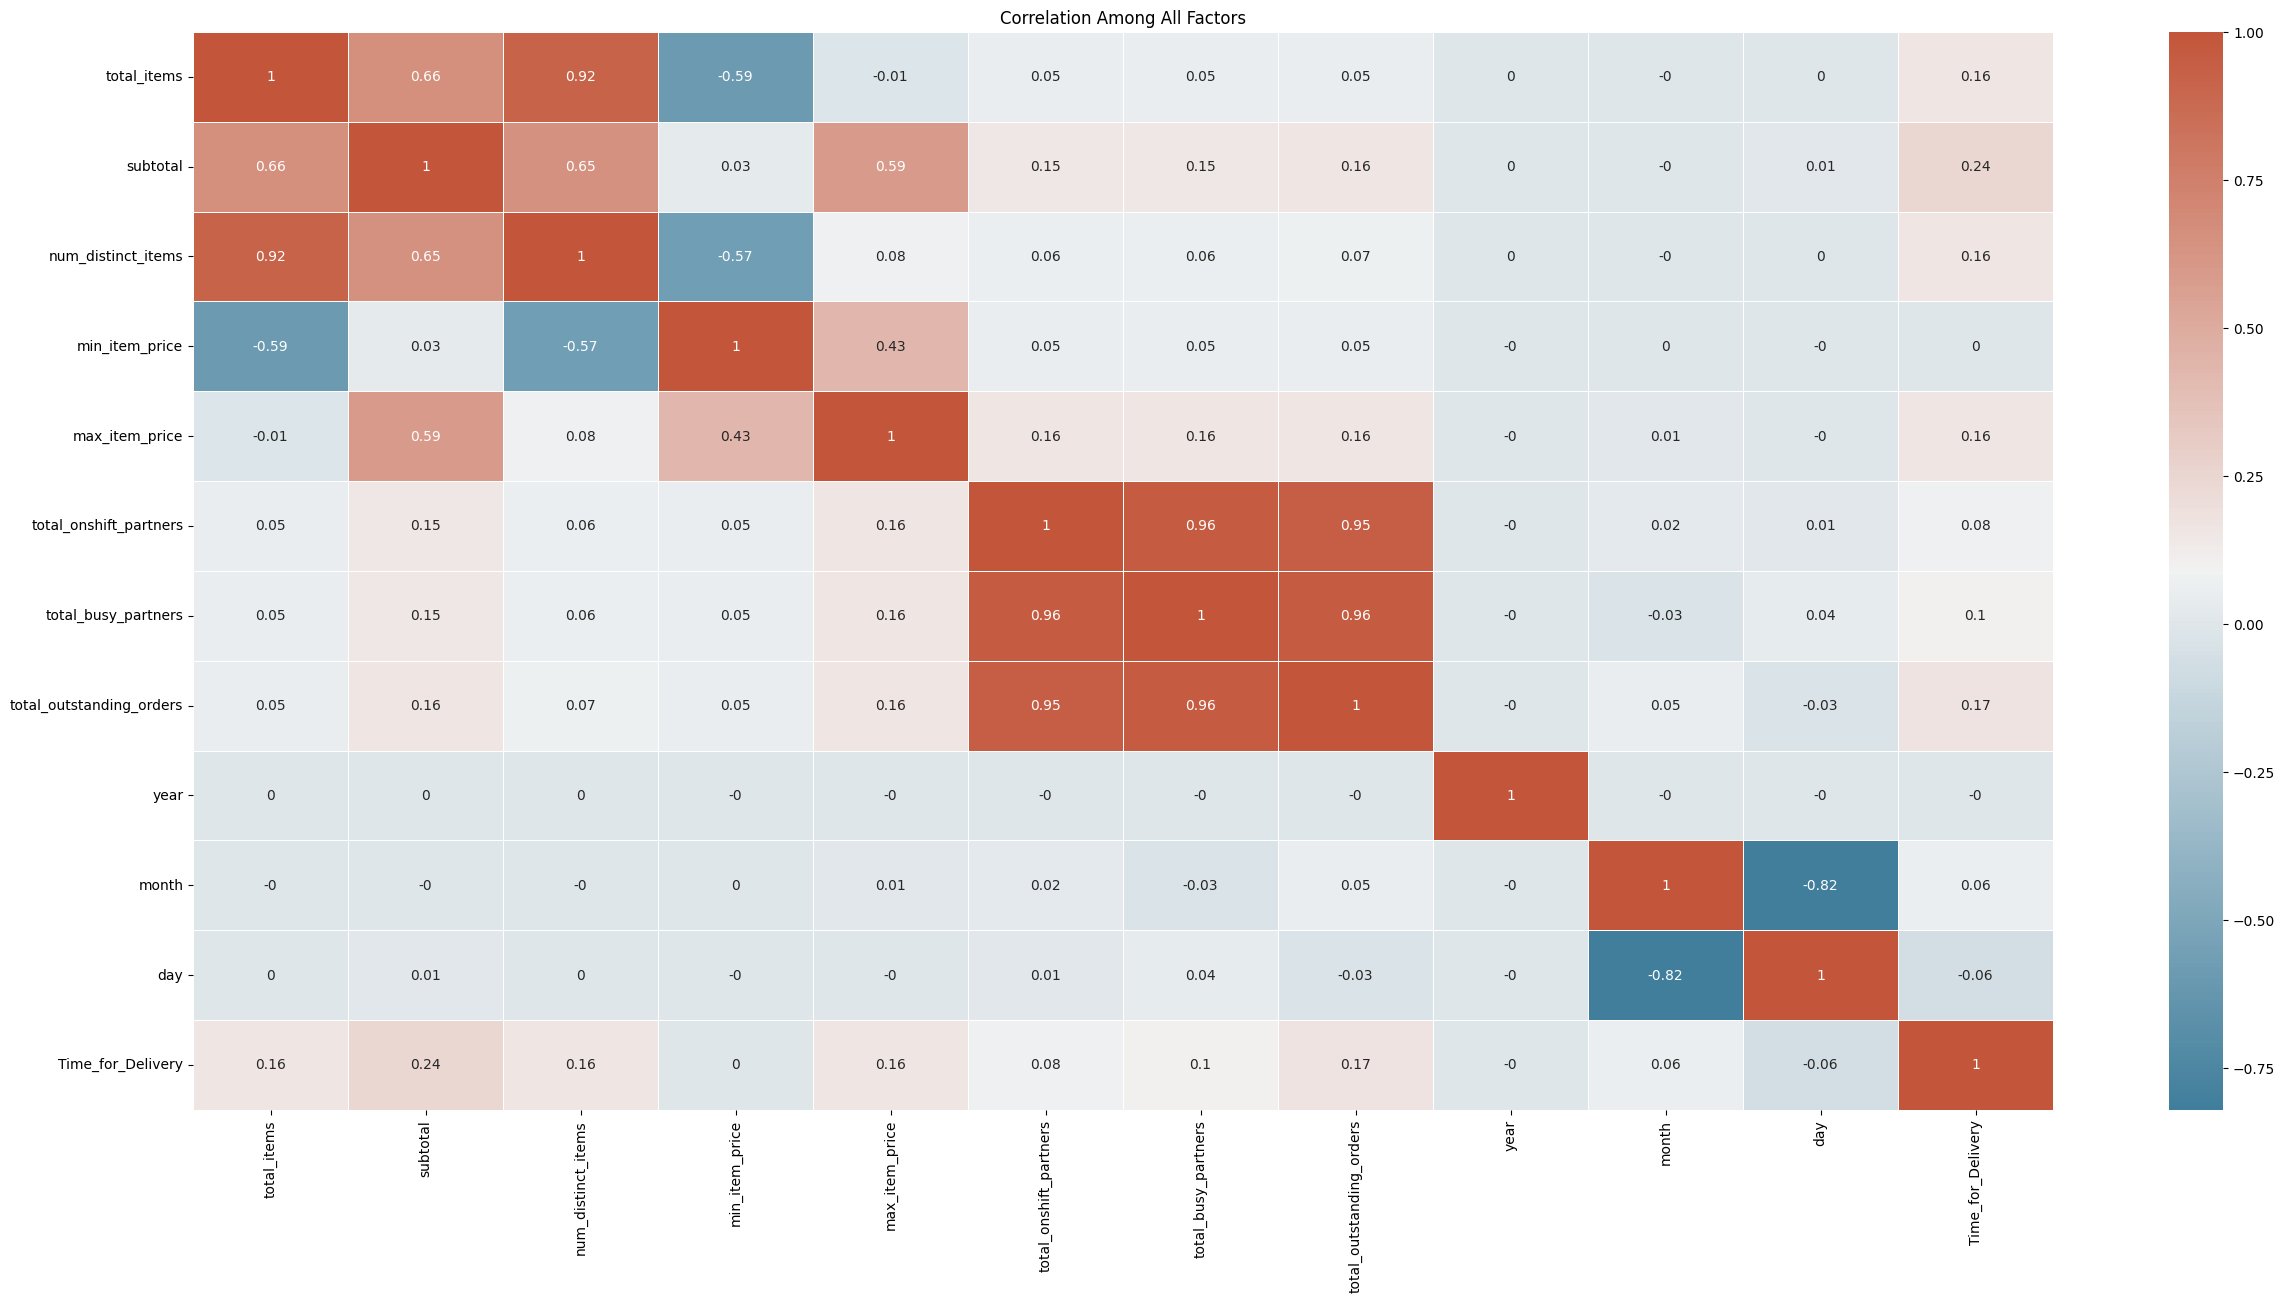

In [ ]:
df_corr = df.corr('spearman')
plt.figure(figsize=(30,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors')
sns.heatmap(np.round(df_corr,2), annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

Observations:

*  number of distinct items and minimum item price are negatively correlated.
*  Total number of on shift partners are highly correlated with busy partners and outstanding orders.

**Outlier Detecttion Using Isolation Forest with contamination of 10%**

In [26]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto',contamination=float(0.1),max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df[df_numerical.columns])

IsolationForest(contamination=0.1, n_jobs=-1, random_state=42)

In [27]:
df['anomaly_scores'] = clf.decision_function(df[df_numerical.columns])
df['anomaly'] = clf.predict(df[df_numerical.columns])

In [28]:
#Dropping Anomalies
df.drop(df[df['anomaly']<0].index,axis=0,inplace=True)

**Encoding Categorical Columns**

In [29]:
#Dropping unwanted Columns
df.drop(['store_id','anomaly_scores','anomaly'],axis=1,inplace=True)

In [30]:
df_categorical=df.select_dtypes(include='object')

In [31]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for feature in df_categorical.columns:
    df[feature]=encoder.fit_transform(df[feature])

In [32]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'year', 'month', 'day',
       'Time_for_Delivery'],
      dtype='object')

**Random Forest-Baseline Model**

In [33]:
targets = df['Time_for_Delivery']
features = df.drop(columns = {'Time_for_Delivery'})

In [34]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,random_state=42)

In [35]:
# scaling the X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#Building Ensemble Bagging Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)


#training the Model
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

def metrics_evals(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true,y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE":mse, 
            "RMSE":rmse, 
            "MAE":mae,
            "MAPE":mape, 
            "R2":r2}

In [39]:
metrics_evals(y_test,y_pred)

{'MSE': 261.2180028617506,
 'RMSE': 16.16224003230216,
 'MAE': 11.370319645314957,
 'MAPE': 0.27428524458310544,
 'R2': 0.1858428279492036}

**Regression with Neural Networks**

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [40]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential

In [44]:
def Create_model():

  model = Sequential([
      Dense(32 , activation = "relu" , input_shape = (14,), 
            kernel_initializer = tf.keras.initializers.GlorotUniform , name = "L1"),
      Dropout(rate=0.20),
      Dense(64 , activation = "relu" , 
            kernel_initializer = tf.keras.initializers.GlorotUniform , name = "L2"),
      Dropout(rate=0.20),
      Dense(128 , activation = "relu" , 
            kernel_initializer = tf.keras.initializers.GlorotUniform , name = "L3"),
      Dropout(rate=0.20),
      Dense(256 , activation = "relu" , 
            kernel_initializer = tf.keras.initializers.GlorotUniform , name = "L4"),
      Dropout(rate=0.20),
      Dense(1 , activation = 'linear' , name = "output"),
  ])
  model.compile(optimizer = tf.keras.optimizers.Adam(),loss = "mean_squared_error", metrics = ["mae"])

  return model

In [47]:
model = Create_model() 

history = model.fit(X_train , y_train , validation_data = (X_test, y_test) , epochs = 100 ,batch_size = 512)

Epoch 1/100
278/278 [==============================] - 7s 17ms/step - loss: 524.1703 - mae: 16.3524 - val_loss: 317.3528 - val_mae: 12.1370
Epoch 2/100
278/278 [==============================] - 4s 13ms/step - loss: 319.2408 - mae: 12.6978 - val_loss: 306.7395 - val_mae: 11.8664
Epoch 3/100
278/278 [==============================] - 5s 17ms/step - loss: 297.8400 - mae: 12.3381 - val_loss: 286.0186 - val_mae: 11.6200
Epoch 4/100
278/278 [==============================] - 4s 13ms/step - loss: 288.5266 - mae: 12.1621 - val_loss: 283.6597 - val_mae: 11.5915
Epoch 5/100
278/278 [==============================] - 4s 13ms/step - loss: 287.8554 - mae: 12.0963 - val_loss: 283.5968 - val_mae: 11.5517
Epoch 6/100
278/278 [==============================] - 5s 16ms/step - loss: 282.1573 - mae: 12.0075 - val_loss: 283.6511 - val_mae: 11.5240
Epoch 7/100
278/278 [==============================] - 4s 13ms/step - loss: 279.4894 - mae: 11.9426 - val_loss: 282.2578 - val_mae: 11.5011
Epoch 8/100
278/278 

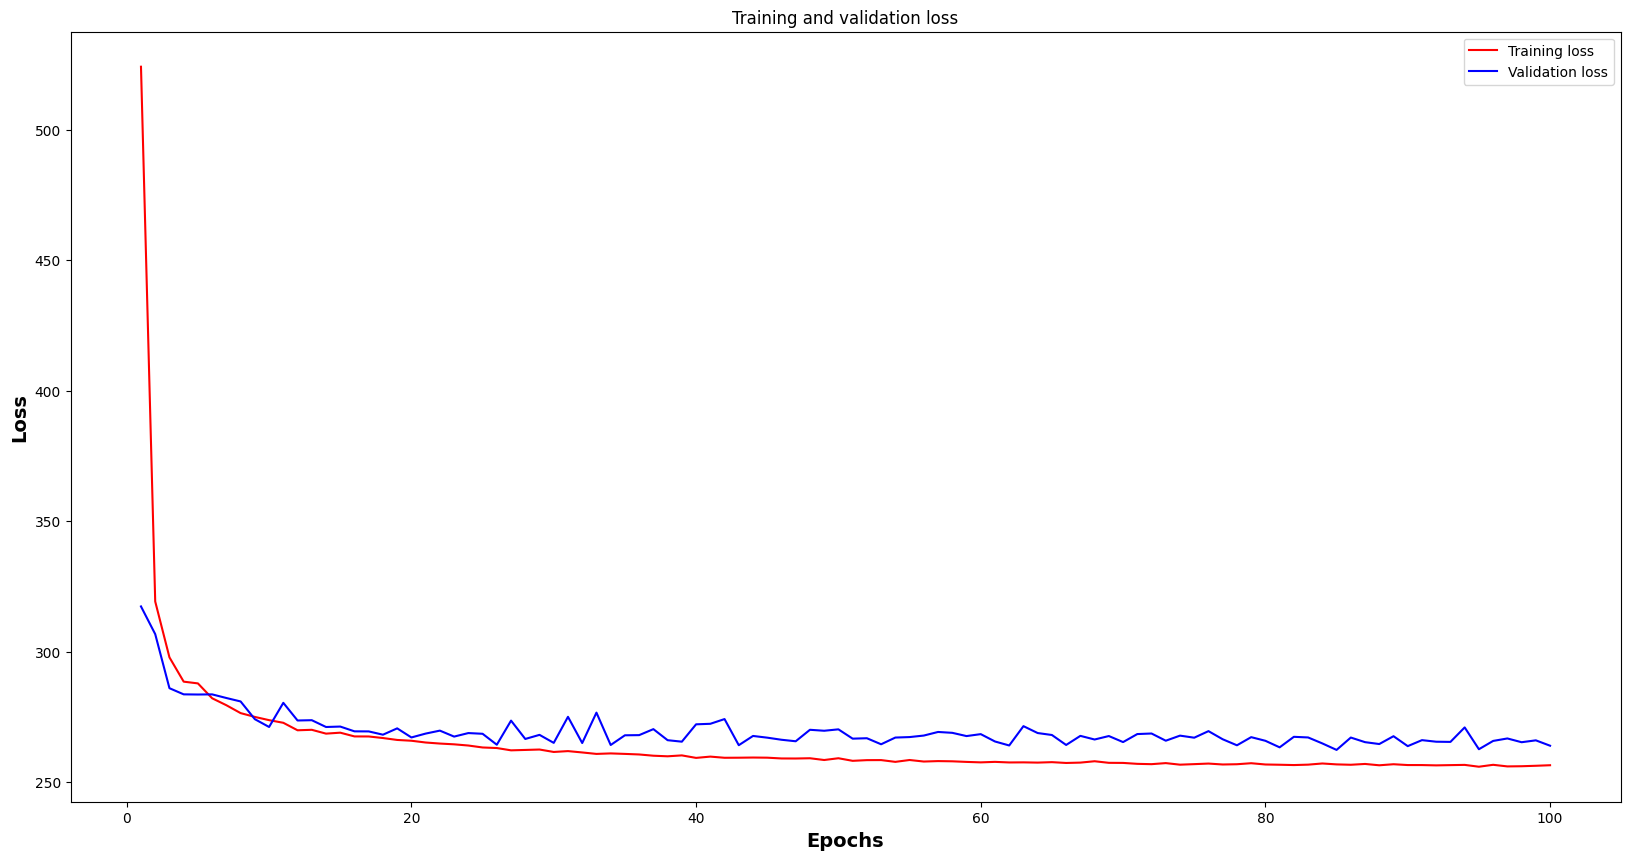

In [48]:
plt.figure(figsize=(20,10))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)

plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs',fontdict={'size':14,'weight':'bold'})
plt.ylabel('Loss',fontdict={'size':14,'weight':'bold'})
plt.legend()
plt.show()



In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 32)                480       
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 L2 (Dense)                  (None, 64)                2112      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 L3 (Dense)                  (None, 128)               8320      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 L4 (Dense)                  (None, 256)              

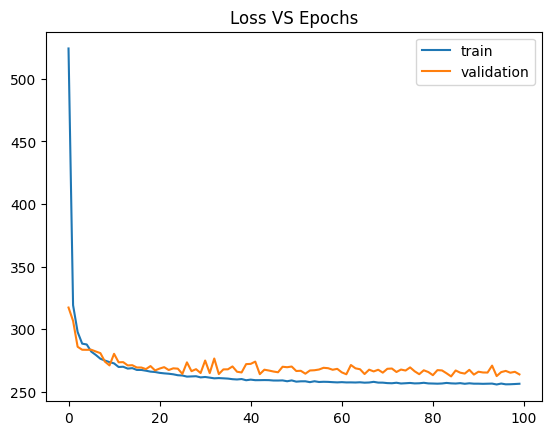

In [50]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


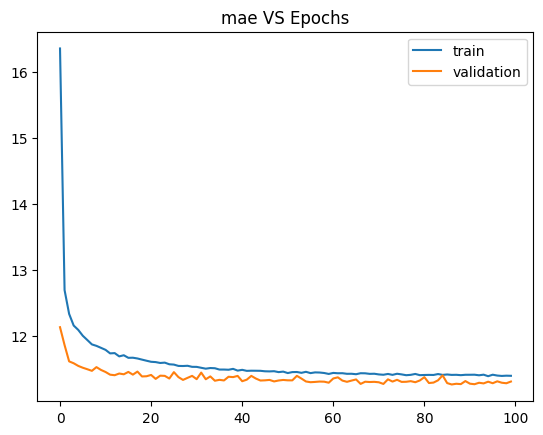

In [51]:
epochs = history.epoch
loss = history.history["mae"]
val_loss = history.history["val_mae"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("mae VS Epochs")

plt.show()
  


In [52]:
evaluation = model.evaluate(X_test, y_test)

1110/1110 [==============================] - 4s 4ms/step - loss: 263.9773 - mae: 11.3152


In [54]:
evaluation = model.evaluate(X_test, y_test)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")



1110/1110 [==============================] - 3s 3ms/step - loss: 263.9773 - mae: 11.3152
Evaluation
LOSS: 263.9773254394531
MAE: 11.31518268585205


In [55]:
y_pred1 = model.predict(X_test)

1110/1110 [==============================] - 3s 2ms/step


In [56]:
metrics_evals(y_test,y_pred1)

{'MSE': 263.9773510393302,
 'RMSE': 16.24737982073818,
 'MAE': 11.31518061118083,
 'MAPE': 0.2670270376358942,
 'R2': 0.17724256654168236}

**Since Neural Network model has less MAPE and MAE compared to Random Forest model, thus NN Regressor model is better than RF model**

**Leading Questions:**

**Defining the problem statements and where can this and modifications of this be used?**

* Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-citylogistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them withconsistent earning & independence. Currently, the company has serviced 5+ million customers
* Porter works with a wide range of restaurants for delivering their items directly to the people.
* Porter has a number of delivery partners available for delivering the food, from various restaurants andwants to get an estimated delivery time that it can provide the customers on the basis of what they areordering, from where and also the delivery partners.

**List 3 functions the pandas datetime provides with one line explanation?**

* pd.to_datetime : Converts a String / Sequence of Strings into a Pandas Datetime object.
* dt.date() : Extracts the Date component from a Pandas Datetime object.
* dt.time() : Extracts the Time component from a Pandas Datetime object.
* dt.year , dt.month , dt.day , dt.hour , dt.minute , dt.second : Extracts the corresponding componentsfrom a Pandas Datetime object.

**Short note on datetime, timedelta, time span?**

* Datetime is a Python class that represents a date and time. It can be used to store and manipulatedates and times.
* Timedelta is a Python class that represents a period of time. It can be used to store and manipulateperiods of time.
* Time span (period) is a general term that refers to a period of time. It can be used to refer to a specificperiod of time, such as a day, week, month, or year, or it can be used to refer to an unspecified periodof time.

**Why do we need to check for outliers in our data?**

Outliers are data points that are significantly different from the rest of the data. They can be caused by avariety of factors, such as data entry errors, measurement errors, or natural variation. Outliers can have asignificant impact on the results of statistical analyses, so it is important to identify and deal with themappropriately

**Name 3 outlier removal methods?**

1. IQR Method
2. Isolation Forest
3. Local Outlier Factor(LOF)

**What classical machine learning methods can we use other than random forest for regression?**

1. Linear Regression
2. Decision tree
3. SVM
4. GBDT Regression


**Why is scaling required for neural networks?**

Having features on a similar scale will help the gradient descent converge more quickly towards the minima. Specifically, in the case of Neural Networks Algorithms, feature scaling benefits optimization by: It makes the training faster. It prevents the optimization from getting stuck in local optima.

**Briefly explain your choice of optimizer.**

Adam is chosen as the best Optimizer for Neural Networks.
Reasons :
* Stability: Adam is a very stable optimizer. It is less likely to diverge than other optimizers, such as SGD.
* Efficiency: Adam is a very efficient optimizer. It can converge to a good solution quickly.
* Generalization: Adam can generalize well to new data. This is because it is able to learn the underlyingpatterns in the data, rather than just memorizing the training data.

**Which activation function did you use and why?**

I considered ReLU Activation function for this Project , due to the Following Reasons :

* Speed: ReLU is a very fast function to compute. This is important for neural networks, which can becomputationally expensive to train.
* Sparsity: ReLU can lead to sparse neural networks. This means that many of the neurons in thenetwork are not activated, which can improve the performance of the network and reduce the amountof computation required.
* Stability: ReLU is a very stable function. This means that it is less likely to cause the neural network todiverge during training.
* Generalization: ReLU can generalize well to new data. This is because it is able to learn the underlyingpatterns in the data, rather than just memorizing the training data.

**Why does a neural network perform well on a large dataset?**

Neural Networks can have a large number of free parameters (the weights and biases between interconnected units) and this gives them the flexibility to fit highly complex data (when trained correctly) that other models are too simple to fit.

* Improved accuracy: Neural networks can learn the underlying patterns in the data more accuratelywhen they are trained on a large dataset. This is because the neural network has more data to learnfrom.
* Reduced variance: Neural networks are less likely to be overfit when they are trained on a largedataset. This is because the neural network has more data to learn from, and it is less likely to learn thepatterns in the training data too well.
* Improved generalization: Neural networks can generalize better to new data when they are trained on alarge dataset. This is because the neural network has learned the underlying patterns in the data, andit is able to apply these patterns to new data.